# **K-mean Clustering**

Clustering models aim to group data into distinct “clusters” or groups. This can both serve as an interesting view in an analysis, or can serve as a feature in a supervised learning algorithm. 

Consider a social setting where there are groups of people having discussions in different circles around a room. When you first look at the room, you just see a group of people. You could mentally start placing points in the center of each group of people and name that point as a unique identifier. You would then be able to refer to each group by a unique name to describe them. This is essentially what k-means clustering does with data. 

A very simple intuition of K-mean clustering can be understood with th help of the plots:
    
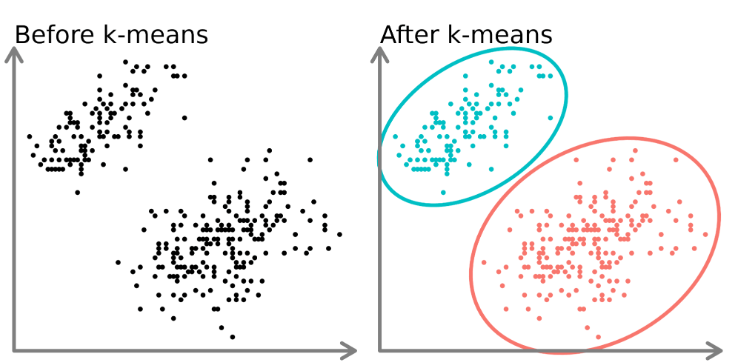
    
    
In the left-hand side of the diagram above, we can see 2 distinct sets of points that are unlabeled and colored as similar data points. Fitting a k-means model to this data (right-hand side) can reveal 2 distinct groups (shown in both distinct circles and colors). 

In two dimensions, it is easy for humans to split these clusters, but with more dimensions, you need to use a model.

### **Working**

**Step 1:**
Choose the number of clusters.


**Step 2:**
Select a random l point, the centroid( not necessarily from dataset)

**Step 3:**
Assign each data point to closest centroid, that forms the k-clusters.

**Step 4:**
Compute and place the new centroid to each cluster.

**Step 5:**
Reassign each data point to the new closes centroid. If any reassignment took place, go to step 4, otherwise finish.

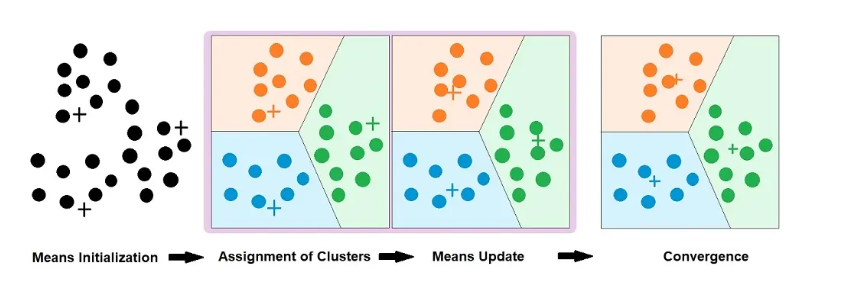

Now that we have understood how K-mean clustering algorithm works. We will now dive into coding part where we will use sklearn to cluster our data using K-mean clustering.

Here is a step by step guide for K-mean clustering.

### **Dataset**
For demonstration I am using the boston housing dataset. For ssimplicity I will only use three columns.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split


In [23]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

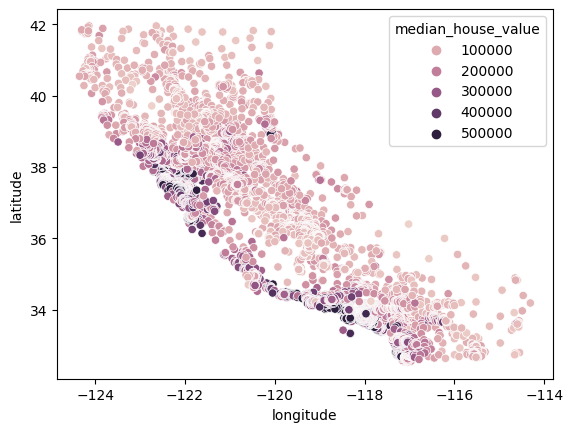

In [25]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'median_house_value')

From the above plot we can see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast. 

### **Preprocess the data**
Before moving any further first we need to standardize our data to ensure that the features are contributed eqally to the distance calculations.

In [40]:
X = df[['latitude', 'longitude']]
y = df[['median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Apply K-Means**
We can apply k-means to our data using sklearn.
Following are some imporatnt parameters that we need to adjust:
1. `n_clusters`: default = 8
The number of clusters to form as well as the number of centroids to generate.
2. `max_iter`: default = 300
3. `algorithm`: default = `lloyd`
The `elkan` variation can be more efficient on some datasets with well-defined clusters


Now let's apply K-means to our data using the default values.

In [42]:
from sklearn.cluster import KMeans

In [45]:
model = KMeans()
model.fit(X_train_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [49]:
model.labels_

array([7, 4, 1, ..., 3, 1, 7], dtype=int32)

Now we can see tha our data has been divided into 8 cluster. Let's try to visualize these clusters.

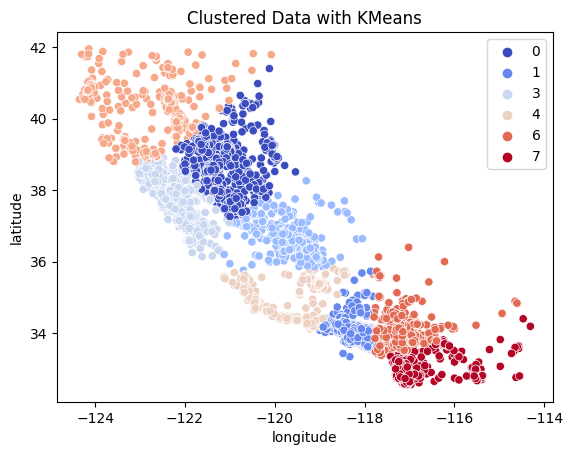

In [47]:
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=model.labels_, palette='coolwarm')
plt.title('Clustered Data with KMeans')
plt.show()

We see that the data are now clearly split into 8 distinct groups. We can also look at the distribution of median house prices in these 8 groups using a boxplot. 

<Axes: ylabel='median_house_value'>

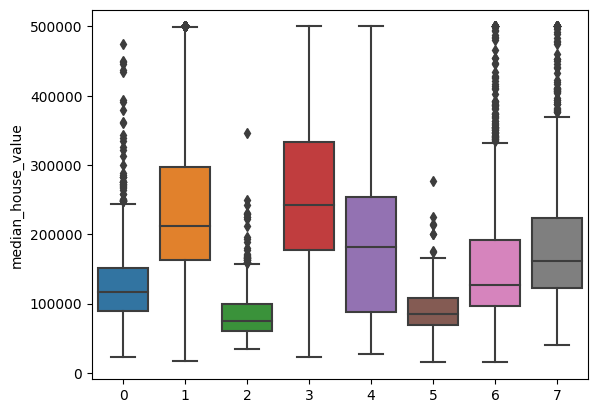

In [50]:
sns.boxplot(x = model.labels_, y = y_train['median_house_value'])

From the above box plot we can see that the cluster 1, 3 and 4 have the highest values, while the clusters 2 and 5 have lowt house values.

If we want to see the performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.

#### **Silhouette Coefficient**
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [51]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_scaled, model.labels_, metric='euclidean')

0.531303393078141

The value 0l53 is an average value, we need to improve this but first we need to determine the optimal number of clusters for our data.

### **Determine the Optimal Number of Clusters using the Elbow Method**
As I mentioned, the elbow method involves finding the optimal k via a graphical representation. It works by finding the within-cluster sum of square (WCSS), i.e. the sum of the square distance between points in a cluster and the cluster centroid.


#### Elbow point:
The elbow graph shows WCSS values on the y-axis corresponding to the different values of K on the x-axis. When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this the elbow point. Beyond the elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

I am also saving the silhouette_score for each mode trained.

In [63]:
# define the wcs array
wcss = []
score = []

In [65]:
for i in range(2, 12):
    model= KMeans(n_clusters = i, n_init = 'auto')
    model.fit(X_train_scaled)
    wcss.append(model.inertia_)
    s_score = silhouette_score(X_train_scaled, model.labels_, metric='euclidean')
    score.append(s_score)

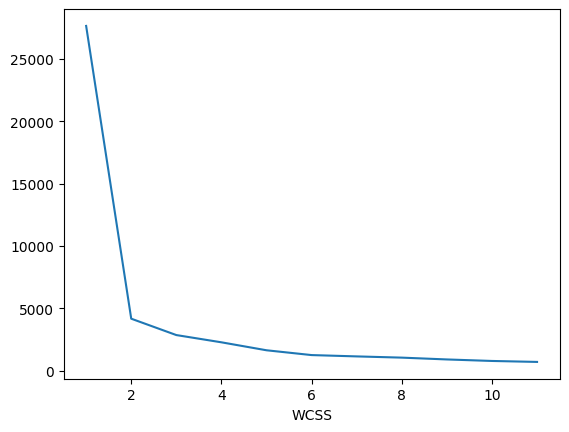

In [66]:
plt.plot(range(1, 12), wcss)
plt.xlabel('Number of Clusters')
plt.xlabel('WCSS')
plt.show()

From te above plot we can clearly see that our elbow point is at k = 2. So now we will apply k-mean clustering with 2 cluster.

### **K-Means With Optimal Clusters**
From the above plot we found that te optimal value for k is 2 so now we will use k-mean with k = 2.

In [68]:
model = KMeans(n_clusters = 2)
model.fit(X_train_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [69]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

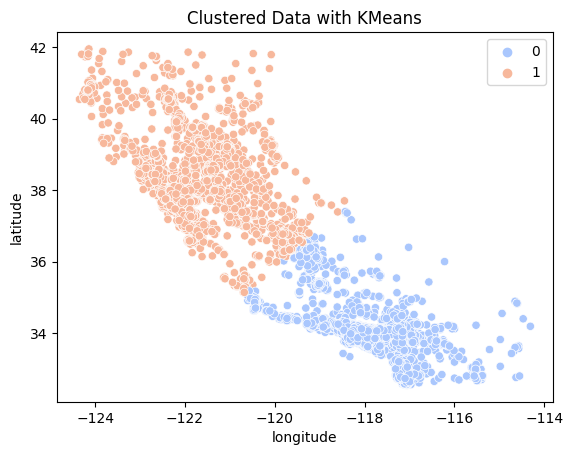

In [70]:
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=model.labels_, palette='coolwarm')
plt.title('Clustered Data with KMeans')
plt.show()

<Axes: ylabel='median_house_value'>

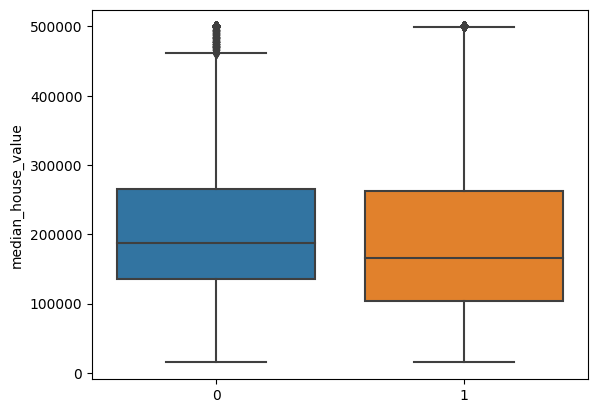

In [71]:
sns.boxplot(x = model.labels_, y = y_train['median_house_value'])

In [72]:
silhouette_score(X_train_scaled, model.labels_, metric='euclidean')

0.7558123957846568

So now we can see that we are getting relatively better score than before.

### **Effect of k on silhouette_score**
We can see how changing the value of k is effecting our model by plotting the scores against the values of k.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


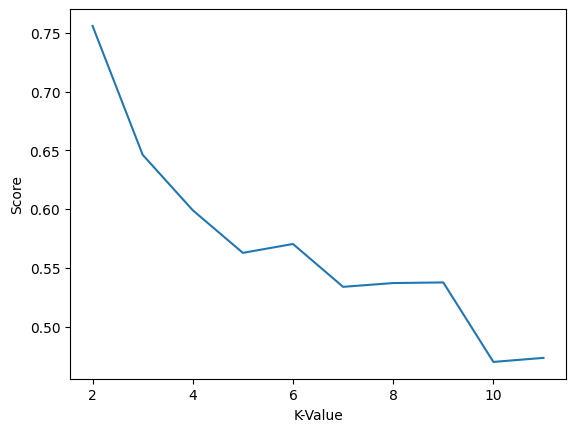

In [79]:
sns.lineplot(x = range(2, 12), y = score)
plt.xlabel('K-Value')
plt.ylabel('Score')
plt.show()

From the above plot we can clearly see that for k = 2 we are getting the best score. That is a confirmation to our findings that we did earlier.

## **K-Means on 3-D Data**
Uptill now we looked at how to do clustering with 2D data. ut we can extend it to higher dimensions also. Let's do K-Mean clustering on a 3D data.

Here I am generating a cstom 3D data using `sklearn.datasets` module.

In [103]:

# Define the centroids for 6 clusters
centroids = [
    (-5, -5, 5), 
    (5, 5, -5), 
    (3.5, -2.5, 4), 
    (-2.5, 2.5, -4),
    (0, 0, 0),  # New centroid
    (2, -3, 3)  # New centroid
]

# Define the cluster standard deviations for 6 clusters
cluster_std = [1.5, 1.5, 1.2, 1, 1.3, 1.1]

# Generate the blobs
X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=6)


We can visualize it with the help of ploty.express to create a 3D plot.

In [104]:
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

Now let's apply K-mean clustering. We can tell by looking at the plot that there are 5 clusters in our data. So the optimal number o k is 5. But fo confirmation we can check it with elbow curve also.

In [105]:
wcss = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    model.fit_predict(X)
    wcss.append(model.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

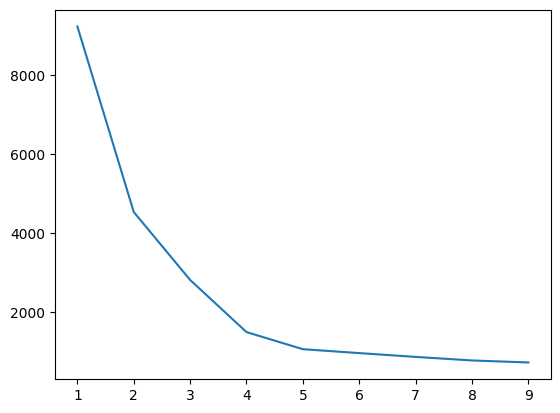

In [106]:
plt.plot(range(1, 10),wcss) 

Here we got two elbow points but for k = 5 we are getting a lower value of WCSS and after 5 the curve becomes constant. So our opotimal value for k is 5.

In [107]:
model = KMeans(n_clusters = 5)
y_pred = model.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [108]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [109]:
fig = px.scatter_3d(df, x = 'col1', y = 'col2', z = 'col3', color = 'label')
fig.show()

By understanding these concepts and techniques, we are now better equipped to apply K-Means clustering to real-world datasets and gain valuable insights from your data. Remember, clustering is an iterative process that often requires experimentation and fine-tuning to achieve the best results.